# House Sales in King County - Project 2 Regression

___

#### Data Set Information:
The description for the 20 features is given below:

- id : It is the unique numeric number assigned to each house being sold.
- date : It is the date on which the house was sold out.
- price: It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
- bedrooms : It determines number of bedrooms in a house.
- bathrooms : It determines number of bathrooms in a bedroom of a house.
- sqft_living : It is the measurement variable which determines the measurement of house in square foot.
- sqft_lot : It is also the measurement variable which determines square foot of the lot.
- floors: It determines total floors means levels of house.
- waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
- view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
- condition : It determines the overall condition of a house on a scale of 1 to 5.
- grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
- sqft_above : It determines square footage of house apart from basement.
- sqft_basement : It determines square footage of the basement of the house.
- yr_built : It detrmines the date of building of the house.
- yr_renovated : It detrmines year of renovation of house.
- zipcode : It determines the zipcode of the location of the house.
- lat : It determines the latitude of the location of the house.
- long : It determines the longitude of the location of the house.
- sqft_living15 : Living room area in 2015(implies-- some renovations)
- sqft_lot15 : lotSize area in 2015(implies-- some renovations)

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv ('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# At least 15 features (columns)
# At least 1000 instances (rows)
df1.shape

(21613, 21)

In [3]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Randomly mask valuee in our dataframe to meet the project requirment of missing value
# Between 5 to 10 percent missing values across the dataset.
np.random.seed(0)
df1_wNaN = df1.mask(np.random.random(df1.shape) < .1)

In [7]:
df1_wNaN.isnull().sum()

id               2190
date             2173
price            2268
bedrooms         2146
bathrooms        2180
sqft_living      2132
sqft_lot         2242
floors           2171
waterfront       2097
view             2124
condition        2221
grade            2263
sqft_above       2164
sqft_basement    2191
yr_built         2163
yr_renovated     2198
zipcode          2210
lat              2189
long             2181
sqft_living15    2131
sqft_lot15       2176
dtype: int64

In [8]:
df1_wNaN.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,NaN,NaN,NaN,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,NaN,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,NaN,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,NaN,1960.0,NaN,1.0,0.0,0.0,...,7.0,NaN,910.0,1965.0,0.0,98136.0,47.5208,-122.393,NaN,5000.0
4,1.954401e+09,20150218T000000,510000.0,NaN,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,NaN,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0


In [9]:
#Impute the missing value by fillna function with pad method 
#since supervised machine learning model cannot handle NaN.
df1_clean = df1_wNaN.fillna(method='pad')
df1_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,NaN,NaN,NaN,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,0.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20141209T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,1.00,1960.0,10000.0,1.0,0.0,0.0,...,7.0,770.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,2720.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,4.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,910.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [10]:
df1_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         1
yr_renovated     1
zipcode          1
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df1_1 = df1.copy() 

In [12]:
import warnings

warnings.filterwarnings('ignore')

# change view to binary 
df1_1.view[df1.view < 1] = 0 
df1_1.view[df1.view >= 1] = 1 

In [13]:
# change waterfront to binary 
df1_1.view[df1.waterfront < 1] = 0 
df1_1.view[df1.waterfront >= 1] = 1 

In [14]:
df1_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
# Make sure view as binary 
print(np.unique(df1_1['view']))

[0 1]


In [16]:
# Make sure waterfront is a binary
print(np.unique(df1_1['waterfront']))

[0 1]


In [17]:
# Delete nominal 
df1_1.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)

df1_1.isnull().values.any()

False

In [18]:
df1_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [19]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.008,3.409,7.657,1788.391,291.509,1971.005,84.402,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.087,0.651,1.175,828.091,442.575,29.373,401.679,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,1.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


In [21]:
df1_1['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
df1_1['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [23]:
df1_1['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

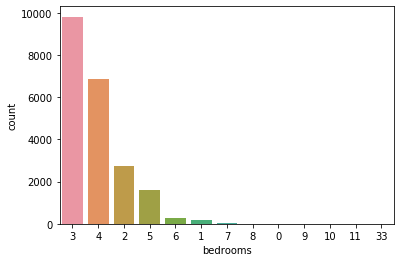

In [24]:
sns.countplot(df1_1.bedrooms, order = df1['bedrooms'].value_counts().index)

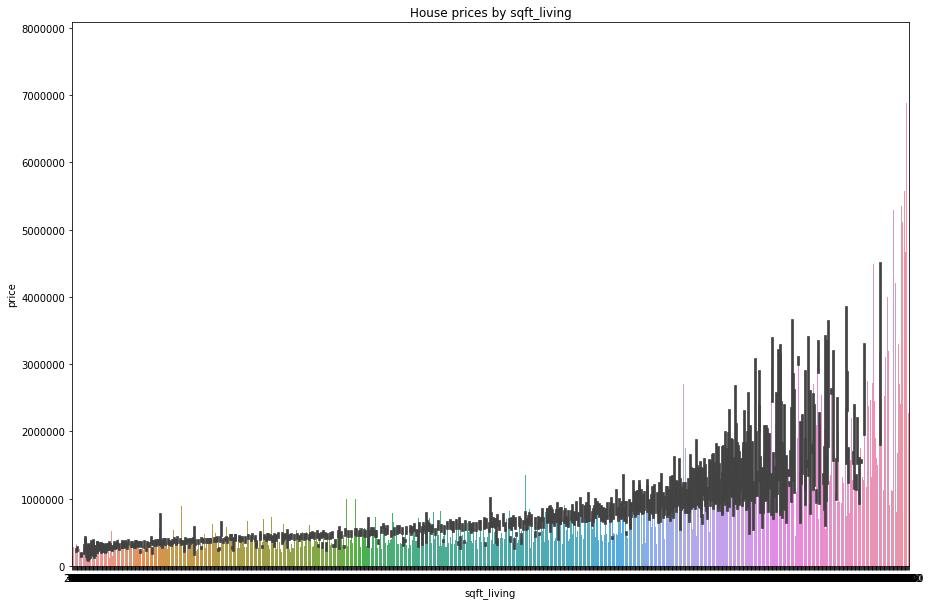

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('House Prices')
sns.barplot(x='sqft_living', y='price', data = df1_1)

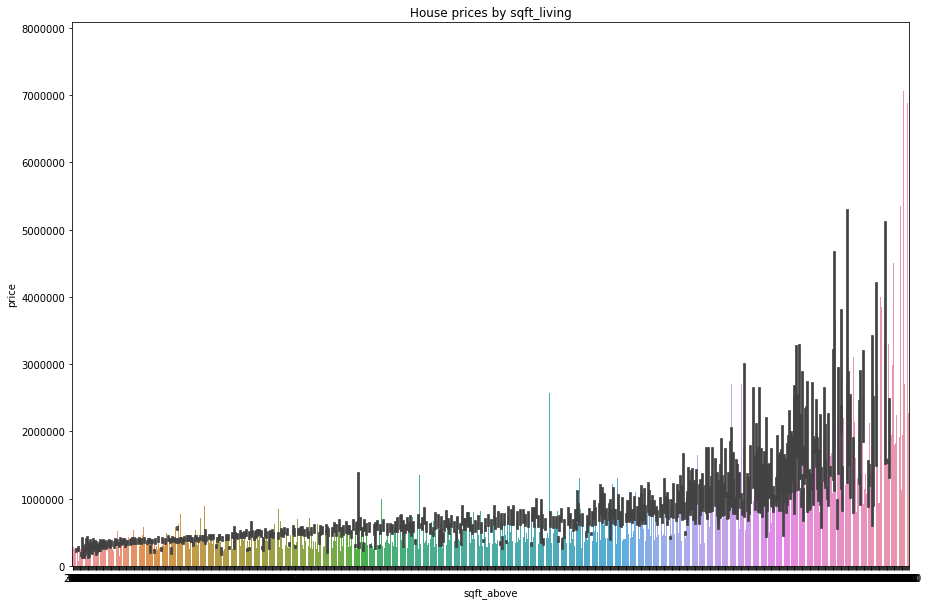

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_above')
plt.ylabel('House Prices')
sns.barplot(x='sqft_above', y='price', data = df1)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <a list of 5 Patch objects>)

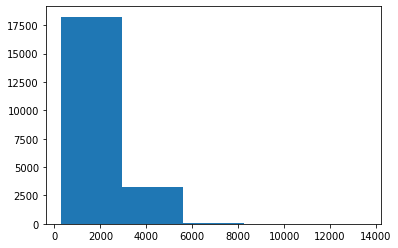

In [27]:
plt.hist('sqft_living', data = df1_1, bins = 5)

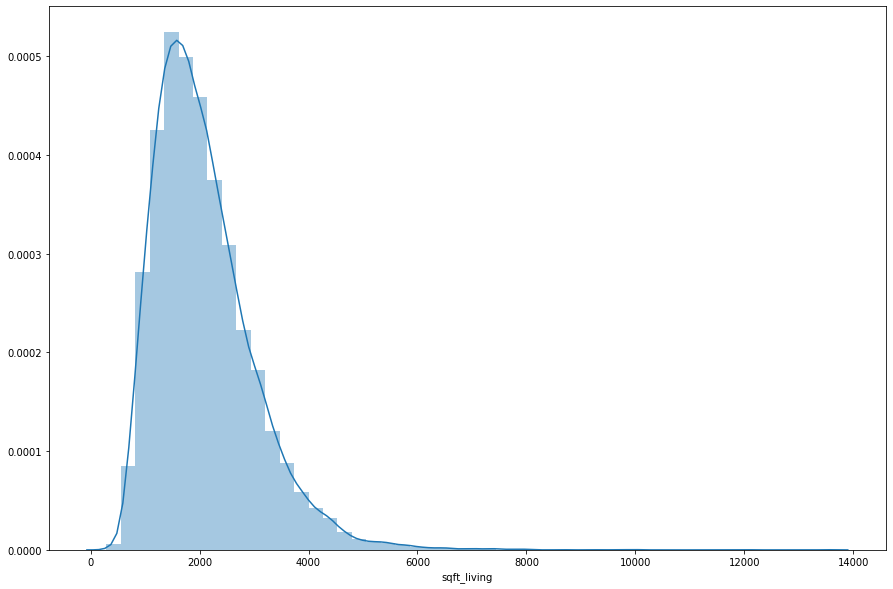

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(df1_1['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

In [29]:
#Finding out mean, median & mode
print('Mean', round(df1_1['sqft_living'].mean(), 2))
print('Median', df1_1['sqft_living'].median())
print('Mode', df1_1['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [30]:
len(df1_1[df1_1['sqft_living']==1300])

138

## Data Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df1_1.drop(['price'],axis=1)
y = df1_1['price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Bagging

#### 1. Lasso with Bagging

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor

lasso_reg = Lasso(alpha = 10,max_iter = 100000 )
bag_lasso_reg = BaggingRegressor(lasso_reg, bootstrap=True, n_jobs=-1,random_state=0)

tuned_parameters= {'n_estimators': [100,200,300,500,700,1000],'max_samples':[1,10,20,50,80,100]}

bag_lasso_reg_grid = GridSearchCV(bag_lasso_reg,tuned_parameters,cv=5,iid = False)
bag_lasso_reg_grid.fit(X_train, y_train)

print(bag_lasso_reg_grid.best_params_)
print(bag_lasso_reg_grid.best_score_)

{'max_samples': 100, 'n_estimators': 1000}
0.6787710005039502


In [46]:
print('R-squared score (Train score):',bag_lasso_reg_grid.score(X_train, y_train))
print('R-squared score (Test score):',bag_lasso_reg_grid.score(X_test, y_test))

R-squared score (Train score): 0.6807296065801283
R-squared score (Test score): 0.6685371211419004


#### <font color='blue'> The best hyperparameters for BaggingRegressor are max_samples in 100 and n_estimators in 1000.  
#### <font color='blue'>The BaggingRegressor is performed with Lasso regression as base estimator. It have 0.6807 in train score and 0.6685 in test score.  

#### 2. Ridge with Bagging

In [157]:
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1)
bag_ridge_reg = BaggingRegressor(ridge_reg, bootstrap=True, n_jobs=-1,random_state=0)

bag_ridge_reg_grid = GridSearchCV(bag_ridge_reg,tuned_parameters,cv=5,iid = False)
bag_ridge_reg_grid.fit(X_train, y_train)

print(bag_ridge_reg_grid.best_params_)
print(bag_ridge_reg_grid.best_score_)

{'max_samples': 100, 'n_estimators': 1000}
0.6073630888301863


In [158]:
print('R-squared score (Train score):',bag_ridge_reg_grid.score(X_train, y_train))
print('R-squared score (Test score):',bag_ridge_reg_grid.score(X_test, y_test))

R-squared score (Train score): 0.6074830685222647
R-squared score (Test score): 0.5919279789350974


#### <font color='blue'> The best hyperparameters for BaggingRegressor are max_samples in 100 and n_estimators in 1000.  
#### <font color='blue'>The BaggingRegressor is performed with Ridge regression as base estimator. It have 0.6074 in train score and 0.5919 in test score. 

## Pasting

#### 1. Lasso with Pasting

In [50]:
lasso_reg = Lasso(alpha = 10,max_iter = 100000 )
past_lasso_reg = BaggingRegressor(lasso_reg, bootstrap=False, n_jobs=-1,random_state=0)

tuned_parameters2= {'n_estimators': [100,200,300,500,700,1000],'max_samples':[20,50,80,100,200,300]}

past_lasso_reg_grid = GridSearchCV(bag_lasso_reg,tuned_parameters2,cv=5,iid = False)
past_lasso_reg_grid.fit(X_train, y_train)

print('Best parameters:',past_lasso_reg_grid.best_params_)
print('Mean cross validation score:',past_lasso_reg_grid.best_score_)

Best parameters: {'max_samples': 300, 'n_estimators': 700}
Mean cross validation score: 0.6868864479726973


In [51]:
print('R-squared score (Train score):',past_lasso_reg_grid.score(X_train, y_train))
print('R-squared score (Test score):',past_lasso_reg_grid.score(X_test, y_test))

R-squared score (Train score): 0.6910963851353968
R-squared score (Test score): 0.6739853638520945


#### <font color='blue'> The best hyperparameters for Lasso with pasting technique are max_samples in 300 and n_estimators in 700.  
#### <font color='blue'> The first model is Lasso Regression with alpha equal to 10, which performed with pasting technique. It have 0.6910 in train score and 0.6739 in test score.

#### 2. Ridge with pasting

In [159]:
ridge_reg = Ridge(alpha = 1)
past_ridge_reg = BaggingRegressor(ridge_reg, bootstrap=False, n_jobs=-1,random_state=0)

past_ridge_reg_grid = GridSearchCV(bag_ridge_reg,tuned_parameters2,cv=5,iid = False)
past_ridge_reg_grid.fit(X_train, y_train)

print('Best parameters:',past_ridge_reg_grid.best_params_)
print('Mean cross validation score:',past_ridge_reg_grid.best_score_)

Best parameters: {'max_samples': 300, 'n_estimators': 100}
Mean cross validation score: 0.6666930230822695


In [160]:
print('R-squared score (Train score):',past_ridge_reg_grid.score(X_train, y_train))
print('R-squared score (Test score):',past_ridge_reg_grid.score(X_test, y_test))

R-squared score (Train score): 0.6681493948241668
R-squared score (Test score): 0.6481303808466654


#### <font color='blue'> The best hyperparameters for Ridge with pasting technique are max_samples in 300 and n_estimators in 100.  
#### <font color='blue'> The first model is Lasso Regression with alpha equal to 10, which performed with pasting technique. It have 0.6681 in train score and 0.6481 in test score.

## Adaboost Boosting

#### 1. LinearSVR with Adaboost Boosting

In [195]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor

linsvr = LinearSVR(C=200, random_state=0)

ada_linsvr_reg = AdaBoostRegressor(linsvr, random_state=0)

tuned_parameters3= {'n_estimators': [50, 100, 200, 500],            
                        'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
                        }

ada_linsvr_reg_grid = GridSearchCV(ada_linsvr_reg,tuned_parameters3,cv=5,iid = False)
ada_linsvr_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=LinearSVR(C=200,
                                                                  dual=True,
                                                                  epsilon=0.0,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1.0,
                                                                  loss='epsilon_insensitive',
                                                                  max_iter=1000,
                                                                  random_state=0,
                                                                  tol=0.0001,
                                                                  verbose=0),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50

In [199]:
print('Best parameters:',ada_linsvr_reg_grid.best_params_)
print('R-squared score (Train score):',ada_linsvr_reg_grid.score(X_train, y_train))
print('R-squared score (Test score):',ada_linsvr_reg_grid.score(X_test, y_test))

Best parameters: {'learning_rate': 0.25, 'n_estimators': 50}
R-squared score (Train score): 0.44752081495796014
R-squared score (Test score): 0.4324446778381124


#### <font color='blue'> The best hyperparameters for LinearSVR with Adaboost technique are learning_rate in 0.25 and n_estimators in 50.  
#### <font color='blue'> The first model is LinearSVR with C equal to 200, which performed with Adaboost technique. It have 0.4475 in train score and 0.4324 in test score.

#### 2. Decision Tree Regressor with Adaboost Boosting

In [203]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(random_state=0)

ada_dtree_reg = AdaBoostRegressor(dtree_reg, n_estimators=700,learning_rate=1, random_state=0)
ada_dtree_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=0,
                                                       splitter='best'),
                  learning_rate=1, loss='linear', n_estimators=700,
                  random_st

In [204]:
print('R-squared score (Train score):',ada_dtree_reg.score(X_train, y_train))
print('R-squared score (Test score):',ada_dtree_reg.score(X_test, y_test))

R-squared score (Train score): 0.9720908651590489
R-squared score (Test score): 0.8898527451042585


#### <font color='blue'> The hyperparameters setting for DecisionTreeRegressor with Adaboost technique are learning_rate in 1 and n_estimators in 700.  
#### <font color='blue'> The second model is DecisionTreeRegressor performed with Adaboost technique, which have 0.9720 in train score and 0.8898 in test score.

## Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)

tuned_parameters_gbrt= {'n_estimators': [5, 20, 100, 200, 500],            
                        'learning_rate':[0.25, 0.5, 0.75, 1],
                        'max_depth':[2, 3, 4, 5]
                        }

model_gbrt = GridSearchCV(gbrt,tuned_parameters_gbrt,cv=3)
model_gbrt.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [74]:
print('Best parameters:',model_gbrt.best_params_)
print('Mean cross validation score:',model_gbrt.best_score_)

Best parameters: {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 500}
Mean cross validation score: 0.8718961369208763


In [75]:
print('R-squared score (Train score):',model_gbrt.score(X_train, y_train))
print('R-squared score (Test score):',model_gbrt.score(X_test, y_test))

R-squared score (Train score): 0.9602518929529711
R-squared score (Test score): 0.8958204703416579


#### <font color='blue'>  The best hyperparameters for GradientBoostingClassifier are laerning_rate in 0.25, max_depth in 3 and n_estimators in 500.

#### <font color='blue'> The GradientBoostingClassifier model have 0.9602 in train score and 0.8958 in test score. This model might be overfitting.

## Deep Learning

In [208]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#Input Layer
model.add(Dense(13, input_dim=17, kernel_initializer='normal', activation='relu'))

#Hidden Layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Complie the model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

Using TensorFlow backend.


In [209]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
16209/16209 [==============================] - 1s 85us/step - loss: 147836071973.3995 - mse: 147836092416.0000
Epoch 2/100
16209/16209 [==============================] - 1s 77us/step - loss: 53308288565.0984 - mse: 53308289024.0000
Epoch 3/100
16209/16209 [==============================] - 1s 76us/step - loss: 42306225838.7730 - mse: 42306244608.0000
Epoch 4/100
16209/16209 [==============================] - 1s 78us/step - loss: 39922520088.3855 - mse: 39922528256.0000
Epoch 5/100
16209/16209 [==============================] - 1s 81us/step - loss: 38733501022.2884 - mse: 38733492224.0000
Epoch 6/100
16209/16209 [==============================] - 1s 79us/step - loss: 37234511934.9853 - mse: 37234524160.0000
Epoch 7/100
16209/16209 [==============================] - 1s 77us/step - loss: 36283037963.5452 - mse: 36283031552.0000
Epoch 8/100
16209/16209 [==============================] - 1s 79us/step - loss: 35438361457.8568 - mse: 35438374912.0000
Epoch 9/100
16209/16209 [=====

In [210]:
model.evaluate(X_test, y_test)

5404/5404 [==============================] - 0s 18us/step


[29388589607.792747, 29388591104.0]

In [213]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('R2 train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('R2 test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

R2 train score: 0.78
R2 test score: 0.78


#### <font color='blue'> In our deep learning model, we have one input layer connect with four hidden layers which activate by 'relu' function. For the output layer, we use mse as a loss function and‘linear’as the activation function. Finally, we get 0.78 r2 score on both train and test data, which is pretty good result.

## PCA Comparsion

In [112]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

X_train_PCA.shape

(16209, 9)

#### (a) KNN Regressor

Text(0, 0.5, 'MSE')

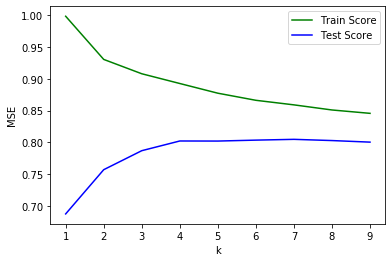

In [113]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_PCA, y_train)
    train_score_array.append(knn_reg.score(X_train_PCA, y_train))
    test_score_array.append(knn_reg.score(X_test_PCA, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_knn.fit(X_train_PCA, y_train)

print("Best parameters: {}".format(grid_knn.best_params_))

Best parameters: {'n_neighbors': 5}


In [127]:
print('R-squared score (training): {:.3f}'
     .format(grid_knn.score(X_train_PCA, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_knn.score(X_test_PCA, y_test)))

R-squared score (training): 0.877
R-squared score (test): 0.802


In [118]:
print('Mean cross validation score:',grid_knn.best_score_)

Mean cross validation score: 0.8017472244951254


<font color='green'> KNN regression model using data from PCA in Project 2:   
Best hyperparameter of model: k=5   
R-squared score (training): 0.877     
R-squared score (test): 0.802  

<font color='blue'>  KNN regression model using data from original preprocess in Project 1:   
Best hyperparameter of model: k=6   
R-squared score (training): 0.867     
R-squared score (test): 0.806  

#### (b) Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_PCA, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
print('R-squared score (Training): {:.4f}'
     .format(lreg.score(X_train_PCA, y_train)))
print('R-squared score (Test): {:.4f}'
     .format(lreg.score(X_test_PCA, y_test)))

R-squared score (Training): 0.6658
R-squared score (Test): 0.6400


<font color='green'> Linear regression model using data from PCA in Project 2:      
R-squared score (training): 0.6658     
R-squared score (test): 0.64 

<font color='blue'> Linear regression model using data from original preprocess in Project 1:      
R-squared score (training): 0.6920     
R-squared score (test): 0.6745 

#### (c) Ridge

In [130]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_PCA,y_train)
    train_score_list.append(ridge.score(X_train_PCA, y_train))
    test_score_list.append(ridge.score(X_test_PCA, y_test))

Text(0.5, 0, '$\\alpha$')

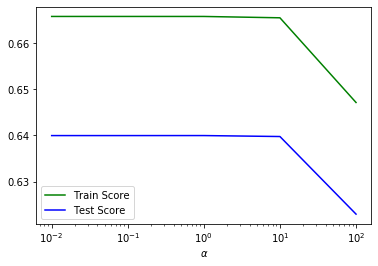

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [132]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_ridge.fit(X_train_PCA,y_train)

print("Best parameters: {}".format(grid_ridge.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_ridge.score(X_train_PCA,y_train)))
print('R-squared score (test): {:.4f}'
     .format(grid_ridge.score(X_test_PCA,y_test)))

Best parameters: {'alpha': 10}
R-squared score (training): 0.6655
R-squared score (test): 0.6398


<font color='green'> Ridge regression model using data from PCA in Project 2:      
Best hyperparameter of model: alpha=10 
R-squared score (training): 0.6655     
R-squared score (test): 0.6398 

<font color='blue'> Ridge regression model using data from original preprocess in Project 1:      
Best hyperparameter of model: alpha=1 
R-squared score (training): 0.6919     
R-squared score (test): 0.6740 

#### (d) Lasso

In [134]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_PCA,y_train)
    train_score_list.append(lasso.score(X_train_PCA,y_train))
    test_score_list.append(lasso.score(X_test_PCA, y_test))

Text(0.5, 0, '$\\alpha$')

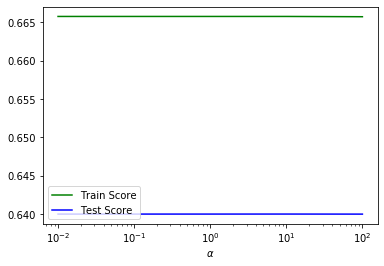

In [135]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [136]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(max_iter = 100000), param_grid, cv=5, return_train_score=True)
grid_lasso.fit(X_train_PCA,y_train)

print("Best parameters: {}".format(grid_lasso.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_lasso.score(X_train_PCA,y_train)))
print('R-squared score (test): {:.4f}'
     .format(grid_lasso.score(X_test_PCA,y_test)))

Best parameters: {'alpha': 100}
R-squared score (training): 0.6657
R-squared score (test): 0.6400


<font color='green'> Lasso regression model using data from PCA in Project 2:      
Best hyperparameter of model: alpha=100 
R-squared score (training): 0.6657     
R-squared score (test): 0.6400 

<font color='blue'> Lasso regression model using data from original preprocess in Project 1:      
Best hyperparameter of model: alpha=10 
R-squared score (training): 0.6920     
R-squared score (test): 0.6745 

#### (e) Polynomial Regression

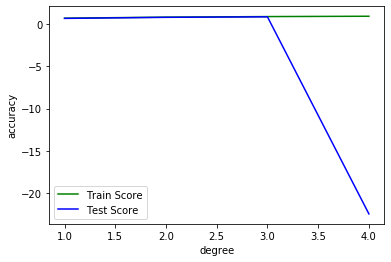

In [142]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_PCA)
    X_test_poly = poly.transform(X_test_PCA)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [150]:
print('R-squared score (train):',train_score_list[2])
print('R-squared score (test):',test_score_list[2])

R-squared score (train): 0.854867184614345
R-squared score (test): 0.824132390583115


<font color='green'>  Polynomial regression model using data from PCA in Project 2:       
R-squared score (training): 0.8548     
R-squared score (test): 0.8241 

<font color='blue'> Polynomial regression model using data from original preprocess in Project 1:       
R-squared score (training): 0.8153     
R-squared score (test): 0.7944 

#### <font color='red'> Polynomial regression model in project1 is not fully optimized. Thus, the model accuracy seems improve in PCA data.

#### (f) SVM

#### Simple SVM

In [152]:
from sklearn.svm import LinearSVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_linsvm = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_linsvm.fit(X_train_PCA, y_train)

print("Best parameters: {}".format(grid_linsvm.best_params_))

print('R-squared score (training): {:.3f}'
     .format(grid_linsvm.score(X_train_PCA, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_linsvm.score(X_test_PCA, y_test)))

Best parameters: {'C': 10, 'epsilon': 0.1}
R-squared score (training): -1.085
R-squared score (test): -1.068


<font color='green'> Simple SVM model using data from PCA in Project 2:       
Best hyperparameters of model: C=10 and epsilon = 0.1  
R-squared score (training): -1.085    
R-squared score (test): -1.068 

<font color='blue'> Simple SVM model using data from original preprocess in Project 1:       
Best hyperparameters of model: C=10 and epsilon = 10  
R-squared score (training): -0.316    
R-squared score (test): -0.301

#### rbf

In [171]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10,100], 'gamma': [0.01, 0.1, 1, 10]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train_PCA, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train_PCA, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test_PCA, y_test)))

Best parameters: {'C': 100, 'gamma': 1}
R-squared score (training): 0.099
R-squared score (test): 0.111


<font color='green'>  SVM model with rbf kernel using data from PCA in Project 2:       
Best hyperparameters of model: C=100 and gamma = 1  
R-squared score (training): 0.099    
R-squared score (test): 0.111

<font color='blue'>  SVM model with rbf kernel using data from original preprocess in Project 1:       
Best hyperparameters of model: C=100 and gamma = 1  
R-squared score (training): 0.097    
R-squared score (test): 0.109

#### ploy

In [155]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train_PCA, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))

print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train_PCA, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test_PCA, y_test)))

Best parameters: {'C': 100, 'gamma': 10}
R-squared score (training): 0.613
R-squared score (test): 0.637


<font color='green'>  SVM model with poly kernel using data from PCA in Project 2:       
Best hyperparameters of model: C=100 and gamma = 10  
R-squared score (training): 0.613    
R-squared score (test): 0.637

<font color='blue'> SVM model with poly kernel using data from original preprocess in Project 1:       
Best hyperparameters of model: C=100 and gamma = 10  
R-squared score (training): 0.817    
R-squared score (test): 0.789

#### linear

In [170]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10,]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train_PCA, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train_PCA, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test_PCA, y_test)))

Best parameters: {'C': 100, 'gamma': 0.01}
R-squared score (training): 0.110
R-squared score (test): 0.116


<font color='green'>  SVM model with linear kernel using data from PCA in Project 2:       
Best hyperparameters of model: C=100 and gamma=0.01  
R-squared score (training): 0.110    
R-squared score (test): 0.116

<font color='blue'> SVM model with linear kernel using data from original preprocess in Project 1:       
Best hyperparameters of model: C=100 and gamma = 0.01  
R-squared score (training): 0.111    
R-squared score (test): 0.116

#### <font color='red'> Conclusion: Using data from PCA does not help in getting better regression result either training or testing process.
#### <font color='red'> The best model for house price prediction in project 2 is GradientBoostingClassifier model with laerning_rate in 0.25, max_depth in 3 and n_estimators in 500,which have 0.9602 in train score and 0.8958 in test score but it might have the risk of overfitting.